# Bike sharing - Multiple Linear Regression Assignment

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

#ignoring unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [104]:
df = pd.read_csv('day.csv')

In [105]:
main_df = pd.read_csv('day.csv')

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [107]:
df=df.drop(['instant','casual','registered'],axis=1)
main_df=main_df.drop(['instant','casual','registered'],axis=1)

In [108]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [109]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [110]:
list2=['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit','cnt']

In [111]:
list_df=['weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt']

In [112]:
#plt.figure(figsize=(20,18))
#sns.pairplot(data=df[list2])
#plt.show()

In [113]:

#plt.figure(figsize=(20,18))
#sns.pairplot(data=df[list_df])
#plt.show()

In [114]:
drop_df = ['instant','dteday','casual','registered']

In [115]:
#df.drop(drop_df,axis=1,inplace=True)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


In [117]:
df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [118]:
df['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [119]:
season_map={1:'spring',2:'summer',3:'fall',4:'winter'}
year_map = {0:2018,1:2019}
month_map = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
weekdays_map = {0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'}
workingdays_map = {0:'Weekend',1:'Weekday'}
weather_map = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
holiday_map = {0:'Not_Holiday',1:'Holiday'}

In [120]:
df['season'] = df['season'].map(season_map)
df['yr'] = df['yr'].map(year_map)
df['mnth'] = df['mnth'].map(month_map)
df['weekday'] = df['weekday'].map(weekdays_map)
df['workingday'] = df['workingday'].map(workingdays_map)
df['weathersit'] = df['weathersit'].map(weather_map)
df['holiday'] = df['holiday'].map(holiday_map)

### Check for outliers

In [121]:
box_plot_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit']

<AxesSubplot:xlabel='season', ylabel='cnt'>

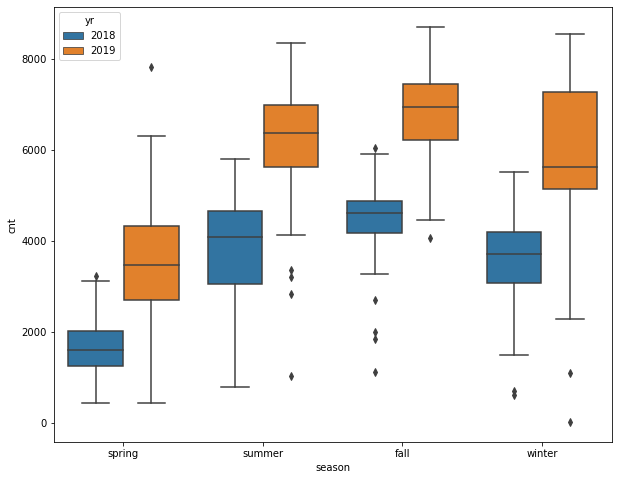

In [122]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'season', y = 'cnt', data = df,hue='yr')

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

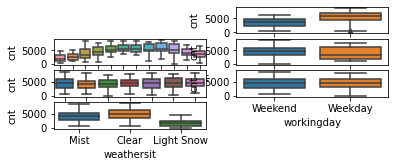

In [123]:

plt.subplot(7,2,2)
sns.boxplot(x='yr',y='cnt',data=df)

plt.subplot(7,2,3)
sns.boxplot(x='mnth',y='cnt',data=df)

plt.subplot(7,2,4)
sns.boxplot(x='holiday',y='cnt',data=df)

plt.subplot(7,2,5)
sns.boxplot(x='weekday',y='cnt',data=df)

plt.subplot(7,2,6)
sns.boxplot(x='workingday',y='cnt',data=df)

plt.subplot(7,2,7)
sns.boxplot(x='weathersit',y='cnt',data=df)

<AxesSubplot:xlabel='season', ylabel='cnt'>

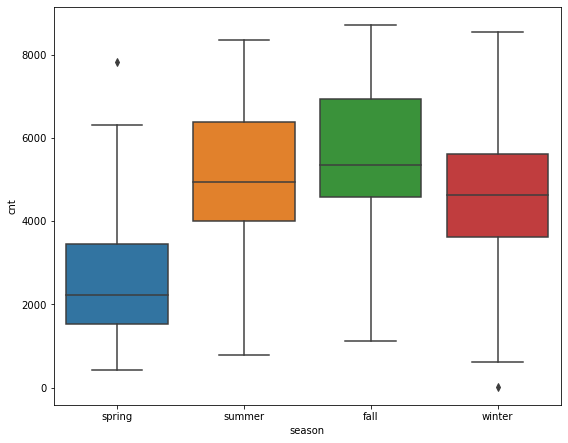

In [124]:
plt.figure(figsize=(20,60))
plt.subplot(7,2,1)
sns.boxplot(x='season',y='cnt',data=df)


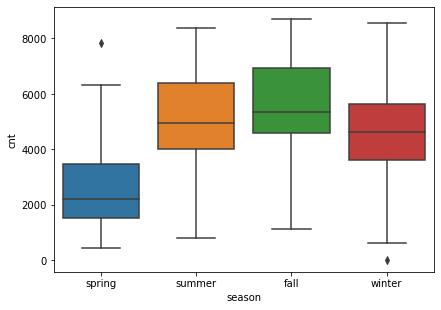

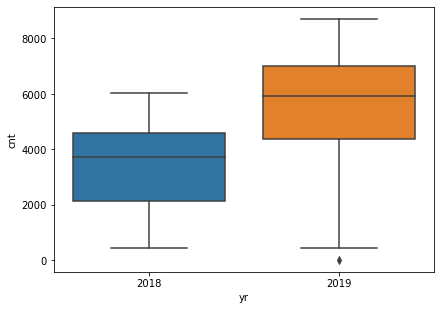

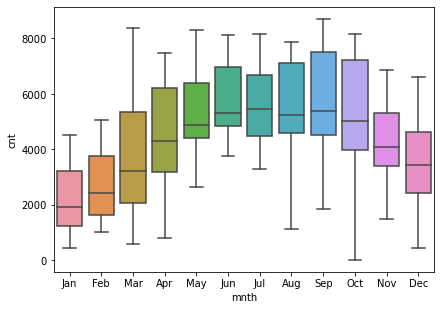

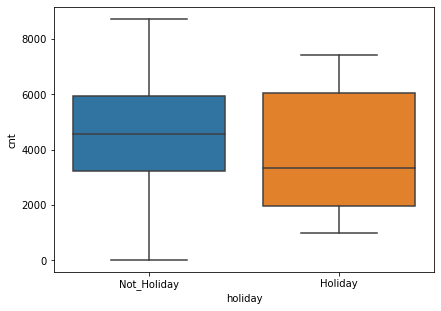

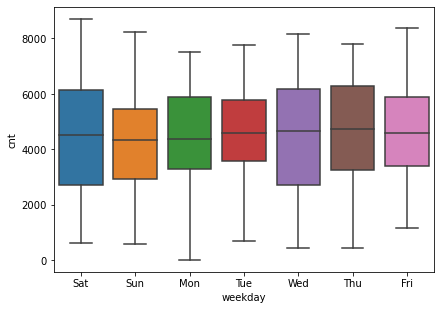

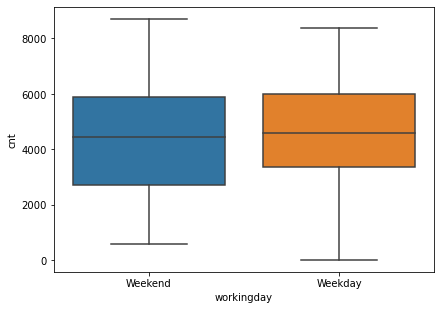

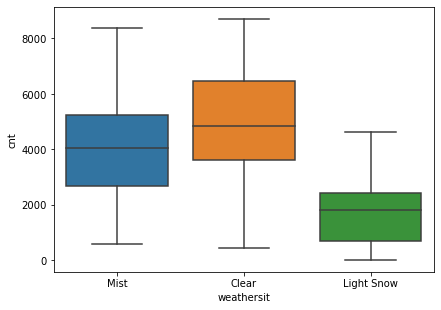

In [125]:
for i in range(len(box_plot_columns)):
    plt.figure(figsize=(15,40))
    plt.subplot(7,2,i+1)
    sns.boxplot(x=str(box_plot_columns[i]),y='cnt',data=df)
    

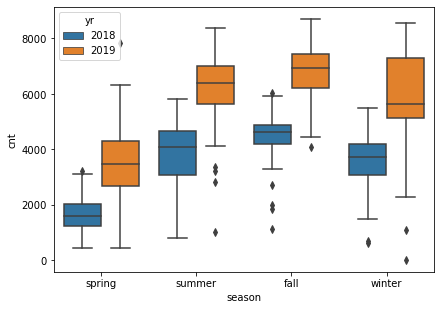

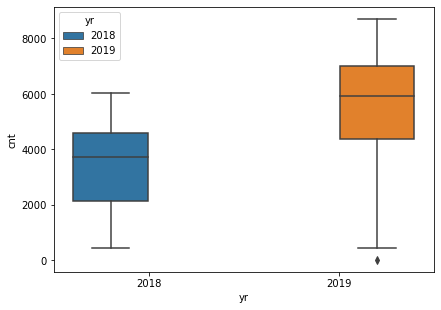

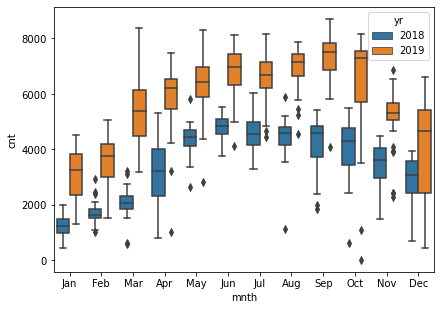

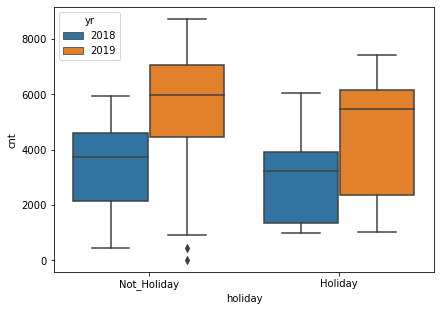

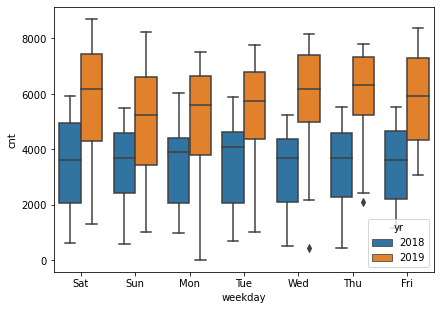

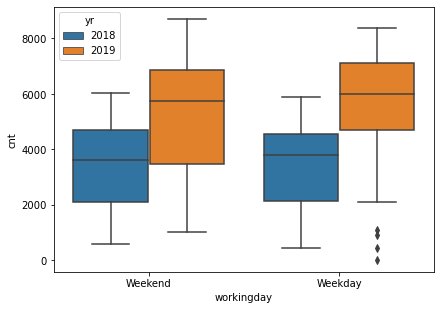

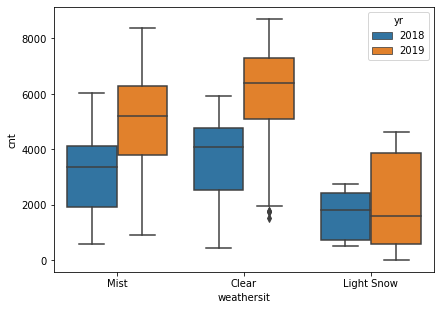

In [126]:
for i in range(len(box_plot_columns)):
    plt.figure(figsize=(15,40))
    plt.subplot(7,2,i+1)
    sns.boxplot(x=str(box_plot_columns[i]),y='cnt',data=df,hue='yr')

In [127]:
Season_dummy = pd.get_dummies(df['season'])

In [128]:
Season_dummy

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
725,0,1,0,0
726,0,1,0,0
727,0,1,0,0
728,0,1,0,0


In [129]:
weekday_dummy = pd.get_dummies(df['weekday'])


In [130]:
mnth_dummy = pd.get_dummies(df['mnth'])


In [131]:
weathersit_dummy = pd.get_dummies(df['weathersit'])
weathersit_dummy

,Clear,Light Snow,Mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,0,0,1
726,0,0,1
727,0,0,1
728,1,0,0


In [132]:
help(pd.concat)

Help on function concat in module pandas.core.reshape.concat:

concat(objs: 'Iterable[NDFrame] | Mapping[Hashable, NDFrame]', axis: 'Axis' = 0, join: 'str' = 'outer', ignore_index: 'bool' = False, keys=None, levels=None, names=None, verify_integrity: 'bool' = False, sort: 'bool' = False, copy: 'bool' = True) -> 'DataFrame | Series'
    Concatenate pandas objects along a particular axis with optional set logic
    along the other axes.
    
    Can also add a layer of hierarchical indexing on the concatenation axis,
    which may be useful if the labels are the same (or overlapping) on
    the passed axis number.
    
    Parameters
    ----------
    objs : a sequence or mapping of Series or DataFrame objects
        If a mapping is passed, the sorted keys will be used as the `keys`
        argument, unless it is passed, in which case the values will be
        selected (see below). Any None objects will be dropped silently unless
        they are all None in which case a ValueError wi

In [133]:
cat_var = ['season','weekday','mnth','weathersit']
dummy_var_list = [Season_dummy,weekday_dummy,mnth_dummy,weathersit_dummy]

In [134]:
main_df= pd.concat([main_df,Season_dummy,weekday_dummy,mnth_dummy,weathersit_dummy],axis=1)

In [135]:
main_df.drop(cat_var,axis=1)

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,fall,...,Jul,Jun,Mar,May,Nov,Oct,Sep,Clear,Light Snow,Mist
0,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,0,0,0,0,0,1
1,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,0,0,0,0,0,1
2,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,0,0,0,1,0,0
3,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,0,0,1,0,0
4,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,0,...,0,0,0,0,0,0,0,0,0,1
726,28-12-2019,1,0,1,10.386653,12.75230,59.0000,10.416557,3095,0,...,0,0,0,0,0,0,0,0,0,1
727,29-12-2019,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,0,...,0,0,0,0,0,0,0,0,0,1
728,30-12-2019,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,0,...,0,0,0,0,0,0,0,1,0,0


In [136]:
main_df=main_df.drop('dteday',axis=1)

In [137]:
main_df=main_df.drop(cat_var,axis=1)
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   fall        730 non-null    uint8  
 9   spring      730 non-null    uint8  
 10  summer      730 non-null    uint8  
 11  winter      730 non-null    uint8  
 12  Fri         730 non-null    uint8  
 13  Mon         730 non-null    uint8  
 14  Sat         730 non-null    uint8  
 15  Sun         730 non-null    uint8  
 16  Thu         730 non-null    uint8  
 17  Tue         730 non-null    uint8  
 18  Wed         730 non-null    uint8  
 19  Apr         730 non-null    u

In [138]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   fall        730 non-null    uint8  
 9   spring      730 non-null    uint8  
 10  summer      730 non-null    uint8  
 11  winter      730 non-null    uint8  
 12  Fri         730 non-null    uint8  
 13  Mon         730 non-null    uint8  
 14  Sat         730 non-null    uint8  
 15  Sun         730 non-null    uint8  
 16  Thu         730 non-null    uint8  
 17  Tue         730 non-null    uint8  
 18  Wed         730 non-null    uint8  
 19  Apr         730 non-null    u

### Splitting Data

In [139]:
df_train, df_test = train_test_split(main_df, train_size = 0.7, random_state=100)

In [140]:
df_train.shape

(510, 34)

In [141]:
df_test.shape

(220, 34)

### Min. Max Scaling

In [142]:
scaler = MinMaxScaler()

In [143]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'fall', 'spring', 'summer', 'winter', 'Fri', 'Mon', 'Sat', 'Sun',
       'Thu', 'Tue', 'Wed', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Clear', 'Light Snow', 'Mist'],
      dtype='object')

In [144]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,fall,spring,...,Jul,Jun,Mar,May,Nov,Oct,Sep,Clear,Light Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.108257,23.500287,63.123710,12.834912,4485.337255,0.262745,0.243137,...,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.625490,0.029412,0.345098
std,0.500429,0.157763,0.468282,7.431626,8.090963,14.153170,5.292031,1950.666077,0.440557,0.429398,...,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.484471,0.169124,0.475867
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.277923,24.131150,63.437500,12.083182,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [145]:
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed','cnt']

In [146]:
help(scaler.fit)

Help on method fit in module sklearn.preprocessing._data:

fit(X, y=None) method of sklearn.preprocessing._data.MinMaxScaler instance
    Compute the minimum and maximum to be used for later scaling.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        The data used to compute the per-feature minimum and maximum
        used for later scaling along the features axis.
    
    y : None
        Ignored.
    
    Returns
    -------
    self : object
        Fitted scaler.



In [147]:
df_train[numeric_columns]=scaler.fit_transform(df_train[numeric_columns])
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,fall,spring,...,Jul,Jun,Mar,May,Nov,Oct,Sep,Clear,Light Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.262745,0.243137,...,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.625490,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.440557,0.429398,...,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.484471,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


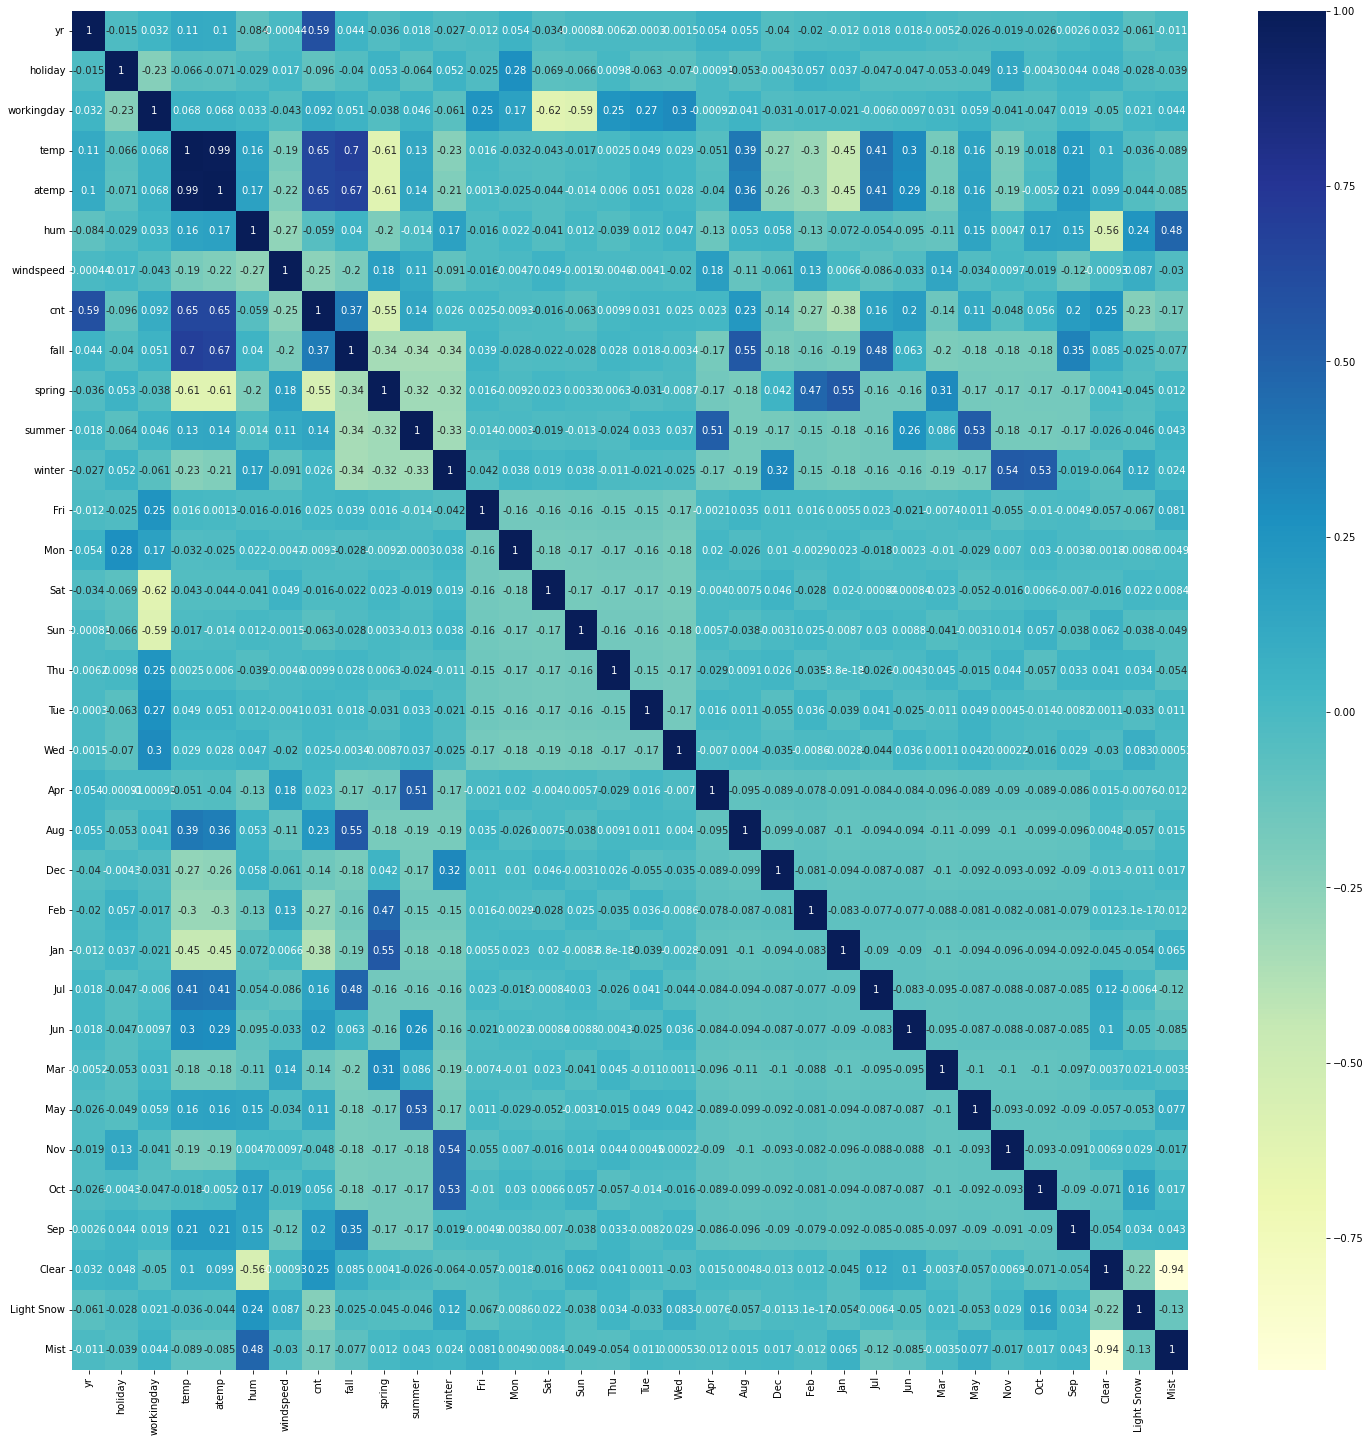

In [148]:
plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu",annot_kws={"fontsize":10})
plt.show()

In [149]:
y_train = df_train.pop('cnt')
X_train = df_train


In [150]:
y_train = pd.DataFrame(y_train)
y_train

,cnt
576,0.827658
426,0.465255
728,0.204096
482,0.482973
111,0.191095
...,...
578,0.832835
53,0.218017
350,0.312586
79,0.236424


In [151]:
#dropping atemp because atemp and temp are high correlated with each other which leads to multicollinearity of the model

df_train =  df_train.drop('atemp',axis = 1)
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,fall,spring,summer,winter,...,Jul,Jun,Mar,May,Nov,Oct,Sep,Clear,Light Snow,Mist
576,1,0,1,0.815169,0.725633,0.264686,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


# Model Building


### Recursive Feature elimination

In [152]:


# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

#List of variables selected in top 15 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))



[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 19),
 ('hum', False, 18),
 ('windspeed', True, 1),
 ('fall', False, 4),
 ('spring', True, 1),
 ('summer', False, 10),
 ('winter', True, 1),
 ('Fri', False, 15),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thu', False, 16),
 ('Tue', False, 11),
 ('Wed', False, 17),
 ('Apr', False, 12),
 ('Aug', False, 6),
 ('Dec', True, 1),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 7),
 ('Mar', False, 13),
 ('May', False, 5),
 ('Nov', True, 1),
 ('Oct', False, 14),
 ('Sep', True, 1),
 ('Clear', True, 1),
 ('Light Snow', True, 1),
 ('Mist', False, 2)]

In [153]:


#assigning the columns selected by RFE to a list
col = X_train.columns[rfe.support_]
print(col.sort_values)

# dataframe with RFE selected features

X_train_rfe = X_train[col]
X_train_rfe.head()

<bound method Index.sort_values of Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'spring', 'winter',
       'Sat', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Clear', 'Light Snow'],
      dtype='object')>


,yr,holiday,workingday,temp,windspeed,spring,winter,Sat,Dec,Jan,Jul,Nov,Sep,Clear,Light Snow
576,1,0,1,0.815169,0.264686,0,0,0,0,0,1,0,0,1,0
426,1,0,0,0.442393,0.255342,1,0,1,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.663106,1,0,0,1,0,0,0,0,1,0
482,1,0,0,0.395666,0.188475,0,0,1,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.380981,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

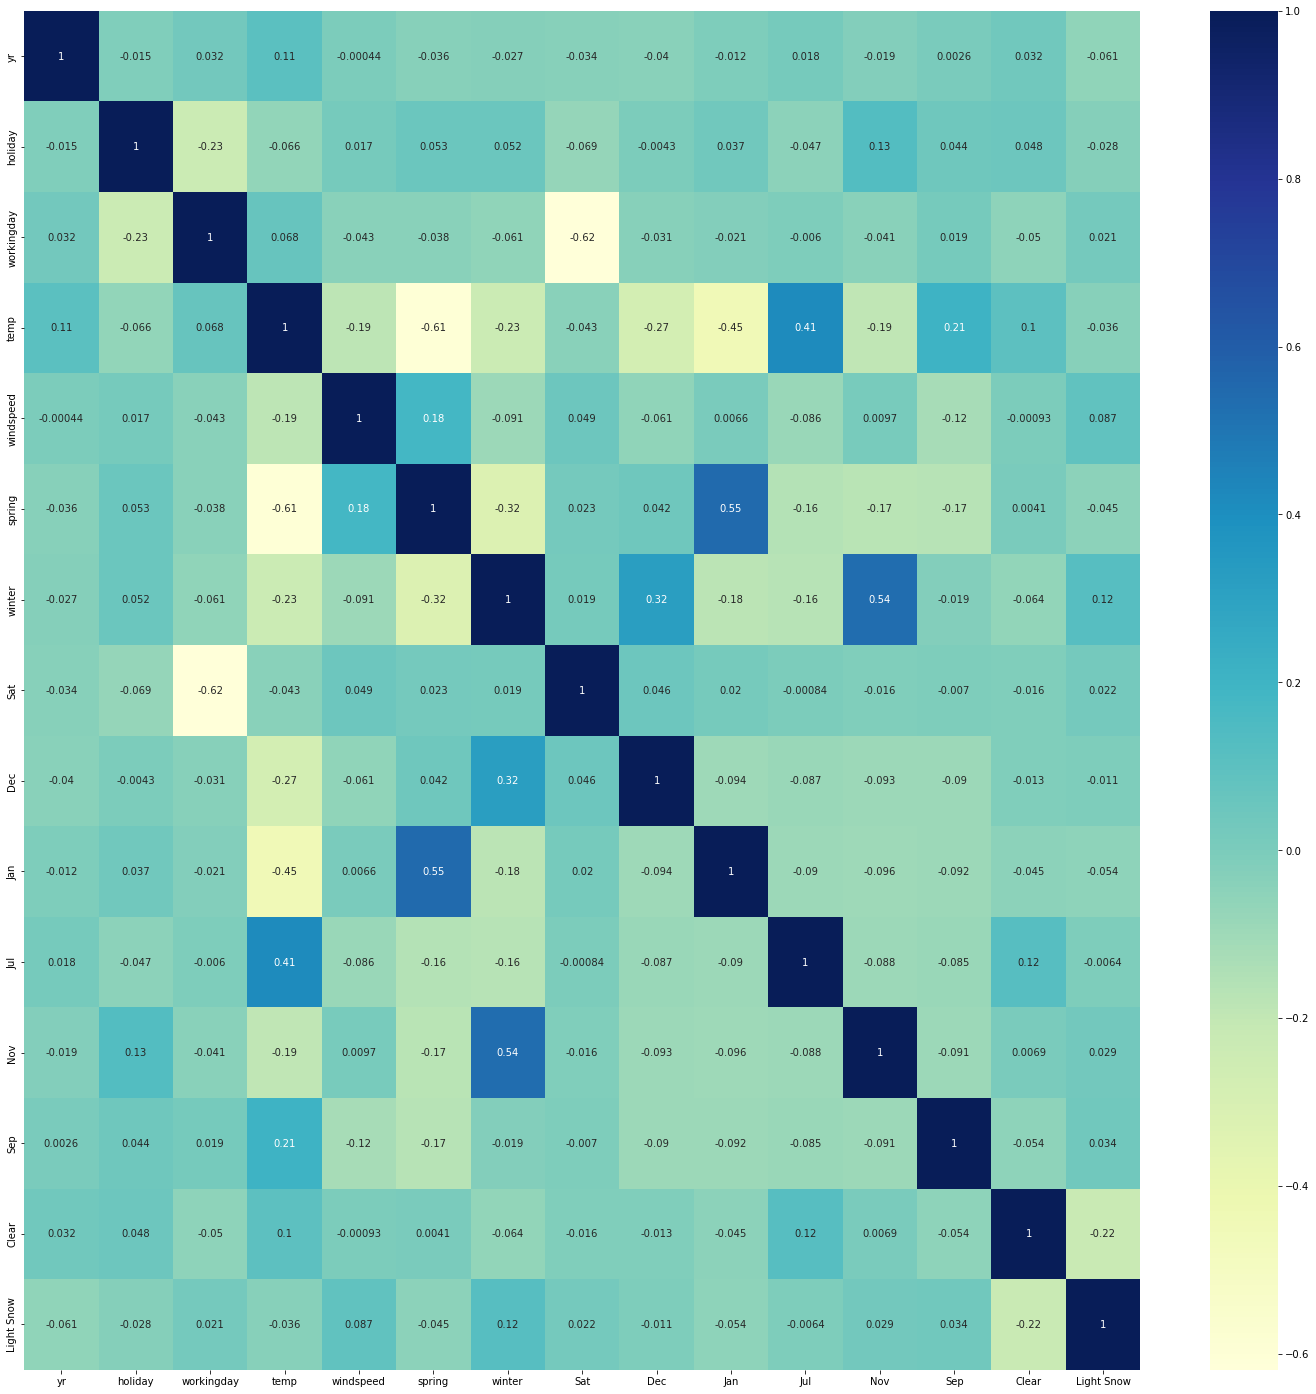

In [154]:
#heatmap of RFE selected columns
plt.figure(figsize = (25,25))
sns.heatmap(X_train_rfe.corr(),cmap="YlGnBu",annot= True)



Observations:

 -working day, misty weather, humidity, and few other variables has multicollinearity, should be handles with VIF and p value



In [155]:
#calculating VIF for the features in X_train_rfe
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
3,temp,7.928057
2,workingday,5.027703
4,windspeed,4.222532
13,Clear,2.841353
5,spring,2.580053
6,winter,2.573920
0,yr,2.068091
7,Sat,1.930551
11,Nov,1.834877
9,Jan,1.661175


Linear model iteration to find a best model by manual elimination of features selected by RFE.

       Order of elimination
        1.High p Hig VIF
        2.High p Low VIF
        3.Low p High VIF



In [156]:
#working day is highly correlated with many variables, so dropping it first
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)

#calculating VIF for the features in X_train_new
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
2,temp,5.430599
3,windspeed,4.097473
12,Clear,2.841353
5,winter,2.545008
4,spring,2.441890
0,yr,2.065813
10,Nov,1.821114
8,Jan,1.633092
7,Dec,1.472355
9,Jul,1.343318


In [157]:

# Building linear regression model

X_train_lm = sm.add_constant(X_train_new)
lr = sm.OLS(y_train,X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.7
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.16e-185
Time:                        23:36:15   Log-Likelihood:                 503.93
No. Observations:                 510   AIC:                            -977.9
Df Residuals:                     495   BIC:                            -914.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2072      0.025      8.256      0.0

#  Residual Analysis

In [158]:
#predicting the dependent variable 'cnt' from the trained model
y_train_cnt = lr.predict(X_train_lm)

In [159]:

(y_train['cnt'] - y_train_cnt).shape


(510,)

Text(0.5, 0, 'Errors')

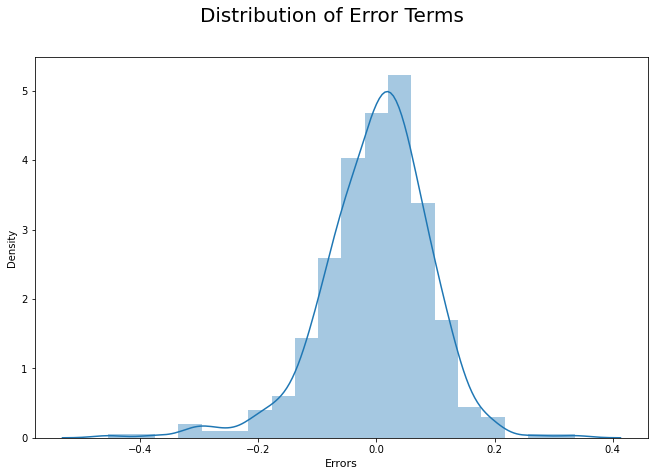

In [160]:
#plotting a histogram with errors on X-axis and density on Y-axis
fig = plt.figure(figsize=(11,7)) #setting the figure size
sns.distplot((y_train['cnt'] - y_train_cnt), bins = 20) #plotting a distribution plot
fig.suptitle('Distribution of Error Terms', fontsize = 20)   #setting the Error Terms             
plt.xlabel('Errors', fontsize = 11) 

Text(0.5, 0, 'Errors')

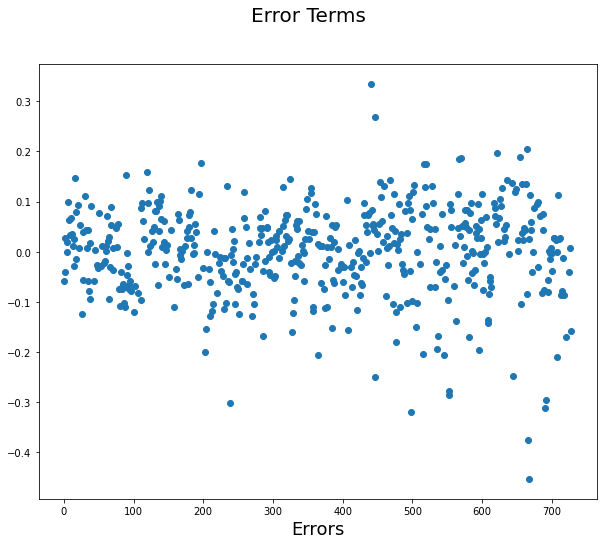

In [161]:
#plotting a scatterplot with the residuals to check the randomness
fig = plt.figure(figsize=(10,8)) #setting the figure size
plt.scatter(y_train.index,(y_train['cnt']-y_train_cnt)) #Plotting scatter plot with the residuals
fig.suptitle('Error Terms', fontsize = 20)        
plt.xlabel('Errors', fontsize = 18)       



Observations :

    1.The errors are normally distributed around zero.
    2.The errors are random and show not trend or dependency.
    3.The errors are nearly homoscedastic.



## Making Predictions

In [162]:
num_vars = ['temp','atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,fall,spring,...,Jul,Jun,Mar,May,Nov,Oct,Sep,Clear,Light Snow,Mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,1,0,...,1,0,0,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,1,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,1,0,0,0,0,0,1,0,0


In [163]:
#creating x_test and y_test from test df
y_test = df_test.pop('cnt')
X_test = df_test

#choosing only columns selected from final model
col1 = X_train_new.columns
X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

X_test_lm.head()

,const,yr,holiday,temp,windspeed,spring,winter,Sat,Dec,Jan,Jul,Nov,Sep,Clear,Light Snow
184,1.0,0,1,0.831783,0.084219,0,0,0,0,0,1,0,0,0,0
535,1.0,1,0,0.901354,0.153728,0,0,0,0,0,0,0,0,1,0
299,1.0,0,0,0.511964,0.334206,0,1,0,0,0,0,0,0,0,0
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0,0,0,1,0
152,1.0,0,0,0.817246,0.537414,0,0,0,0,0,0,0,0,1,0


In [164]:
#prediction from the final model
y_pred = lr.predict(X_test_lm)

In [165]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8169


# Model Evaluation


    1.Linearity of the model
    2.Homoscedacity
    3.Error terms are independent of each other
    4.Error terms normal distribution - is already verified


Text(0.5, 0, 'Errors')

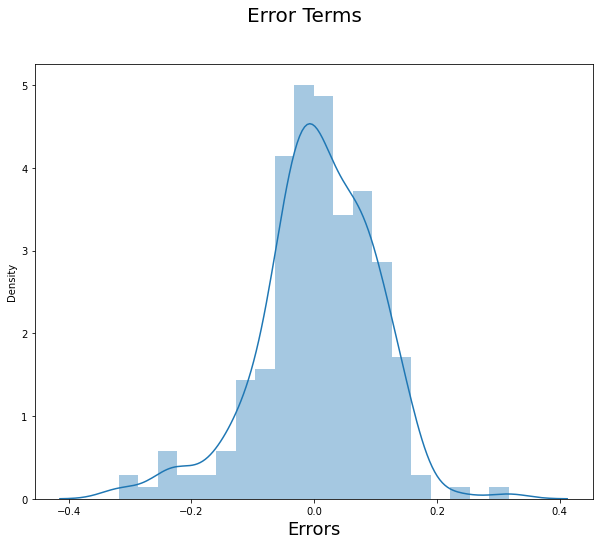

In [166]:
#plotting a histogram with errors on X-axis and density on Y-axis
fig = plt.figure(figsize=(10,8)) #setting the figure size
sns.distplot((y_test - y_pred), bins = 20) #plotting a distribution plot
fig.suptitle('Error Terms', fontsize = 20)   #setting the Error Terms             
plt.xlabel('Errors', fontsize = 18)   

Text(0.5, 0, 'Errors')

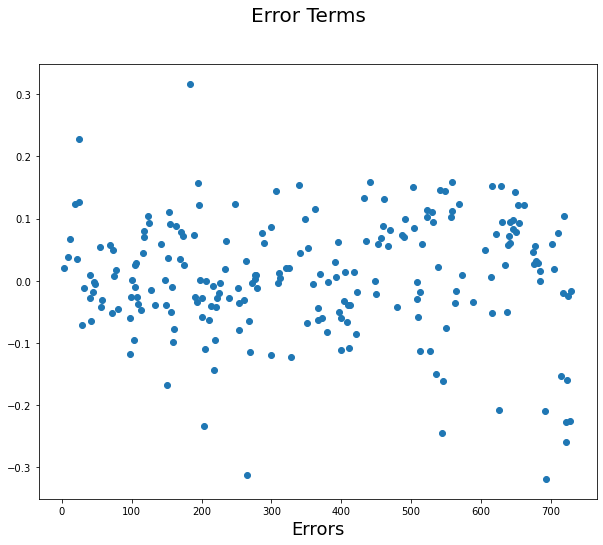

In [167]:
#plotting a scatterplot with the residuals to check the randomness

fig = plt.figure(figsize=(10,8)) #setting the figure size
plt.scatter(y_test.index,(y_test-y_pred)) #Plotting scatter plot with the residuals
fig.suptitle('Error Terms', fontsize = 20)        
plt.xlabel('Errors', fontsize = 18)    


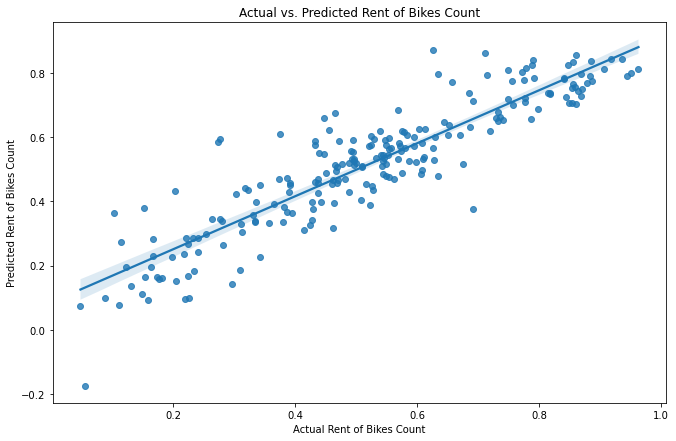

In [168]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(11,7)) #setting the figure size
sns.regplot(x=y_test, y=y_pred)
plt.title('Actual vs. Predicted Rent of Bikes Count') # Plot-heading
plt.xlabel('Actual Rent of Bikes Count') # X-label
plt.ylabel('Predicted Rent of Bikes Count') # Y-label
plt.show()


Observations :

    The errors in case of test data are also normally distributed around the mean 0.
    The errors are random and show no trend or dependency.
    The errors are nearly homoscedastic.
    The y_pred and y_test are pretty close.





In [169]:


Cofficients = round(lr.params,2)
tempFN = Cofficients.sort_values(ascending = False)
tempFN



temp          0.40
yr            0.24
const         0.21
Clear         0.08
winter        0.06
Sep           0.05
Sat           0.02
Dec          -0.05
Nov          -0.05
Jan          -0.06
Jul          -0.07
holiday      -0.09
spring       -0.10
windspeed    -0.16
Light Snow   -0.21
dtype: float64

In [170]:
for i in range(0, len(tempFN)):
    print(tempFN[i],'*',tempFN.index[i],end ='')
    print(' + ',end ='')

0.4 * temp + 0.24 * yr + 0.21 * const + 0.08 * Clear + 0.06 * winter + 0.05 * Sep + 0.02 * Sat + -0.05 * Dec + -0.05 * Nov + -0.06 * Jan + -0.07 * Jul + -0.09 * holiday + -0.1 * spring + -0.16 * windspeed + -0.21 * Light Snow + 

## Equation of best line 

0.43 * const + 0.25 * yr + 0.09 * Clear + 0.08 * Sep + 0.06 * Sat + 0.05 * workingday + 0.01 * winter + 0.01 * Jul + -0.04 * holiday + -0.1 * Nov + -0.11 * Dec + -0.12 * Jan + -0.2 * windspeed + -0.22 * spring + -0.23 * Light Snow 


## Insights:

    Temperature is the Most Significant Feature which affects the Business positively, Whereas the other Environmental condition such as Raining, Humidity, Windspeed and Cloudy affects the Business negatively.

    Company need to think how to tackle with bad weather condition and come up with sort of solution which protect users from Raining.

    The Demand of Bikes is more in the Winter and Summer season, mostly user don't like to travel using Bikes in Rainy Day or Rainy Season.

    Demand of Bike Rent has been significantly increased in the 2019 than 2018 so it is clear sign that Boom Bikes is doing a Business.

    Even though without expending a single cent BOOM Bikes can expect their business to grow by 27%.

The top variables which are significant in our model are :

    Temperature
    Year
    Winter
    Sep
    Summer
    Aug
    Holiday
    Bad Weather
    Windspeed
    Humidity

